<a href="https://colab.research.google.com/github/sahiltambe18/ML_notebooks/blob/main/knn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [2]:
df=pd.read_csv('/content/Credit Card Customer Data - Credit Card Customer Data.csv')

In [3]:
df.shape

(660, 7)

In [4]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [5]:
km = KMeans(n_clusters=3)

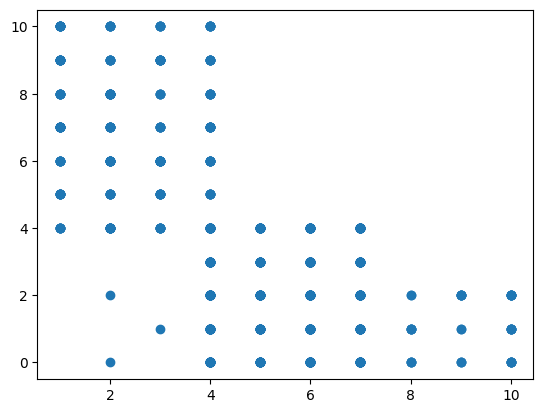

In [6]:
plt.scatter(df['Total_Credit_Cards'],df['Total_calls_made'])

In [7]:
cl = km.fit_predict(df[['Total_Credit_Cards','Total_calls_made','Avg_Credit_Limit']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
df['cluster'] = cl

In [25]:
df.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
0,1,87073,100000,2,1,1,0,1
1,2,38414,50000,3,0,10,9,1
2,3,17341,50000,7,1,3,4,1
3,4,40496,30000,5,1,1,4,0
4,5,47437,100000,6,0,12,3,1


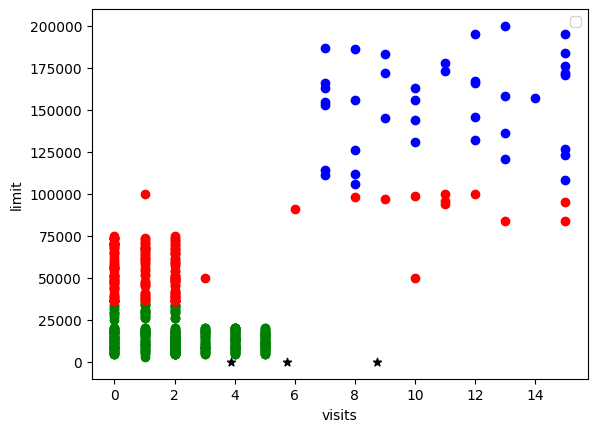

In [10]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

plt.scatter(df1.Total_visits_online,df1['Avg_Credit_Limit'],color='green')
plt.scatter(df2.Total_visits_online,df2['Avg_Credit_Limit'],color='red')
plt.scatter(df3.Total_visits_online,df3['Avg_Credit_Limit'],color='blue')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='black',marker='*')
plt.xlabel('visits')
plt.ylabel('limit')
plt.legend()

In [31]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

df['Avg_Credit_Limit'] = scaler.fit_transform(df[['Avg_Credit_Limit']])
df['Total_visits_bank'] = scaler.fit_transform(df[['Total_visits_bank']])

In [32]:
df.describe()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,cluster
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,330.500000,55141.443939,0.160275,4.706061,0.480606,2.606061,3.583333,0.406061
std,190.669872,25627.772200,0.190992,2.167835,0.326363,2.935724,2.865317,0.599919
min,1.000000,11265.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,165.750000,33825.250000,0.035533,3.000000,0.200000,1.000000,1.000000,0.000000
50%,330.500000,53874.500000,0.076142,5.000000,0.400000,2.000000,3.000000,0.000000
75%,495.250000,77202.500000,0.228426,6.000000,0.800000,4.000000,5.000000,1.000000
max,660.000000,99843.000000,1.000000,10.000000,1.000000,15.000000,10.000000,2.000000


In [34]:
sse = []
k_rng = range(1,10)
for k in k_rng:
  km = KMeans(n_clusters=k)
  km.fit(df[['Avg_Credit_Limit','Total_visits_bank']])
  sse.append(km.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0.5, 0, 'k')

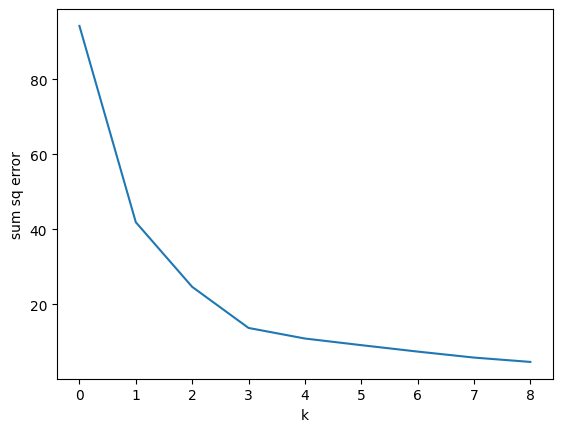

In [37]:
plt.plot(sse)
plt.ylabel("sum sq error")
plt.xlabel("k")